In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/drive/MyDrive/ICICIBANK.NS.csv",index_col=[0])
data.index=pd.to_datetime(data.index)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,233.000000,233.000000,225.545456,229.045456,222.659241,10404350.0
2017-01-03,229.181824,232.181824,226.636368,231.272720,224.824402,10236706.0
2017-01-04,231.136368,232.500000,227.636368,228.272720,221.908035,6901181.0
2017-01-05,230.181824,235.000000,229.272720,233.863632,227.343079,13830668.0
2017-01-06,234.772720,237.636368,233.818176,234.681824,228.138458,9055143.0


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-22,553.099976,553.500000,530.599976,533.799988,533.799988,24515997.0
2021-01-25,536.549988,542.299988,531.200012,538.049988,538.049988,23415249.0
2021-01-27,537.799988,539.200012,519.099976,522.349976,522.349976,28049286.0
2021-01-28,514.599976,529.849976,512.000000,528.250000,528.250000,29836591.0
2021-01-29,533.349976,544.950012,529.450012,537.000000,537.000000,33172808.0


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,360.502697,365.397370,355.352525,360.398707,357.478342,2.344117e+07
std,82.739508,83.527082,81.951127,82.840739,85.026141,1.797668e+07
min,229.181824,232.181824,225.545456,228.272720,221.908035,1.114874e+06
25%,295.062500,298.812500,290.962509,294.100006,288.612259,1.300484e+07
50%,346.649994,352.925003,340.550003,345.974991,344.808120,1.835441e+07
75%,408.312500,412.925010,400.849999,408.474998,408.376328,2.802180e+07
max,555.000000,561.000000,550.599976,556.500000,556.500000,2.868577e+08


In [6]:
data.shape

(1008, 6)

In [7]:
data.isnull().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.shape

(1006, 6)

In [11]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

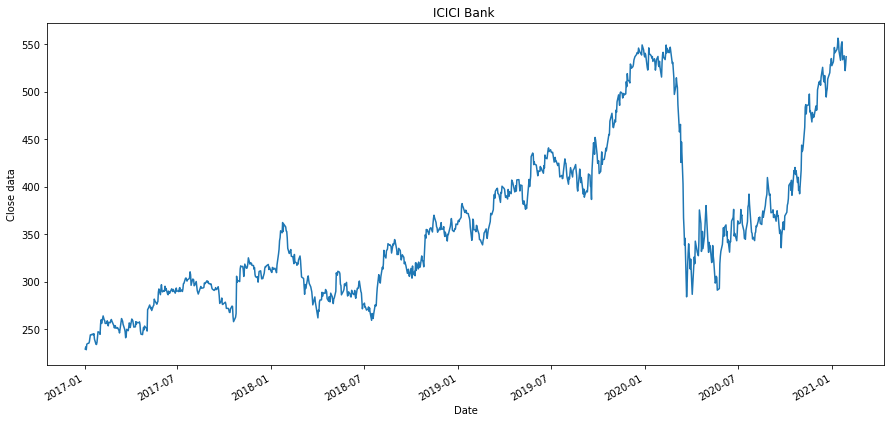

In [13]:
data.Close.plot(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel('Close data')
plt.title("ICICI Bank ")
plt.show()


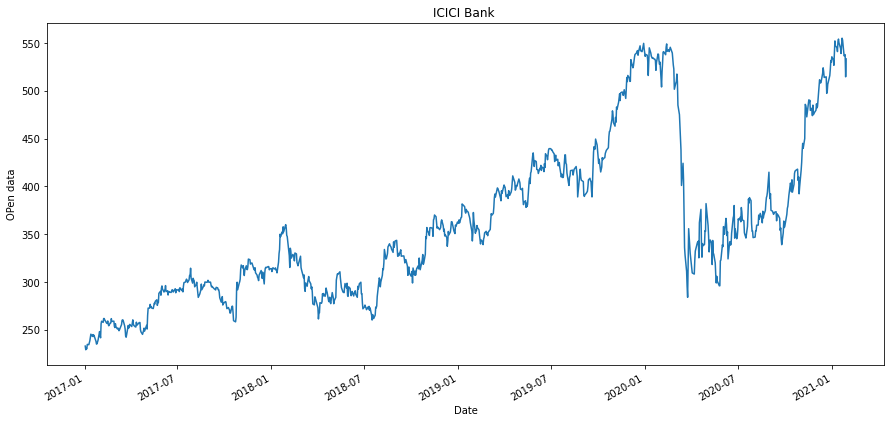

In [14]:
data.Open.plot(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel('OPen data')
plt.title("ICICI Bank ")
plt.show()


In [19]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-02-02 15:33:29--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-02-02 15:33:30--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-02-02 15:33:30--  https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.so

In [15]:
import talib as tb

In [16]:
data['RSI']=tb.RSI(data["Close"].values,timeperiod=14)

In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2021-01-22,553.099976,553.500000,530.599976,533.799988,533.799988,24515997.0,51.365823
2021-01-25,536.549988,542.299988,531.200012,538.049988,538.049988,23415249.0,53.416843
2021-01-27,537.799988,539.200012,519.099976,522.349976,522.349976,28049286.0,45.742457
2021-01-28,514.599976,529.849976,512.000000,528.250000,528.250000,29836591.0,48.723851
2021-01-29,533.349976,544.950012,529.450012,537.000000,537.000000,33172808.0,52.860801


In [18]:
data["DIFF1"]=data["Close"].diff().values

In [19]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,DIFF1
Date,,,,,,,,
2021-01-22,553.099976,553.500000,530.599976,533.799988,533.799988,24515997.0,51.365823,-18.900024
2021-01-25,536.549988,542.299988,531.200012,538.049988,538.049988,23415249.0,53.416843,4.250000
2021-01-27,537.799988,539.200012,519.099976,522.349976,522.349976,28049286.0,45.742457,-15.700012
2021-01-28,514.599976,529.849976,512.000000,528.250000,528.250000,29836591.0,48.723851,5.900024
2021-01-29,533.349976,544.950012,529.450012,537.000000,537.000000,33172808.0,52.860801,8.750000


In [20]:
data["DIFF2"]=data["Close"].diff(2).values
data["DIFF3"]=data["Close"].diff(3).values
data["DIFF4"]=data["Close"].diff(4).values
data.tail()


,Open,High,Low,Close,Adj Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4
Date,,,,,,,,,,,
2021-01-22,553.099976,553.500000,530.599976,533.799988,533.799988,24515997.0,51.365823,-18.900024,-17.200012,-12.650024,0.649964
2021-01-25,536.549988,542.299988,531.200012,538.049988,538.049988,23415249.0,53.416843,4.250000,-14.650024,-12.950012,-8.400024
2021-01-27,537.799988,539.200012,519.099976,522.349976,522.349976,28049286.0,45.742457,-15.700012,-11.450012,-30.350036,-28.650024
2021-01-28,514.599976,529.849976,512.000000,528.250000,528.250000,29836591.0,48.723851,5.900024,-9.799988,-5.549988,-24.450012
2021-01-29,533.349976,544.950012,529.450012,537.000000,537.000000,33172808.0,52.860801,8.750000,14.650024,-1.049988,3.200012


In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4
Date,,,,,,,,,,,
2017-01-02,233.000000,233.000000,225.545456,229.045456,222.659241,10404350.0,NaN,NaN,NaN,NaN,NaN
2017-01-03,229.181824,232.181824,226.636368,231.272720,224.824402,10236706.0,NaN,2.227264,NaN,NaN,NaN
2017-01-04,231.136368,232.500000,227.636368,228.272720,221.908035,6901181.0,NaN,-3.000000,-0.772736,NaN,NaN
2017-01-05,230.181824,235.000000,229.272720,233.863632,227.343079,13830668.0,NaN,5.590912,2.590912,4.818176,NaN
2017-01-06,234.772720,237.636368,233.818176,234.681824,228.138458,9055143.0,NaN,0.818192,6.409104,3.409104,5.636368


In [22]:
data["Trend"]=np.where(data.Close.shift(-1)>data.Close,1,0)

In [23]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trend
Date,,,,,,,,,,,,
2017-01-02,233.000000,233.000000,225.545456,229.045456,222.659241,10404350.0,NaN,NaN,NaN,NaN,NaN,1
2017-01-03,229.181824,232.181824,226.636368,231.272720,224.824402,10236706.0,NaN,2.227264,NaN,NaN,NaN,0
2017-01-04,231.136368,232.500000,227.636368,228.272720,221.908035,6901181.0,NaN,-3.000000,-0.772736,NaN,NaN,1
2017-01-05,230.181824,235.000000,229.272720,233.863632,227.343079,13830668.0,NaN,5.590912,2.590912,4.818176,NaN,1
2017-01-06,234.772720,237.636368,233.818176,234.681824,228.138458,9055143.0,NaN,0.818192,6.409104,3.409104,5.636368,1
2017-01-09,234.454544,236.227264,232.727264,235.181824,228.624512,7875294.0,NaN,0.500000,1.318192,6.909104,3.909104,1
2017-01-10,236.363632,238.090912,234.818176,236.545456,229.950134,14784040.0,NaN,1.363632,1.863632,2.681824,8.272736,1
2017-01-11,238.636368,243.727264,237.818176,240.636368,233.926971,19565679.0,NaN,4.090912,5.454544,5.954544,6.772736,1
2017-01-12,242.363632,245.000000,241.318176,243.954544,237.152634,11711279.0,NaN,3.318176,7.409088,8.772720,9.272720,0


In [24]:
data.dropna(inplace=True)

In [26]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume,RSI,DIFF1,DIFF2,DIFF3,DIFF4,Trend
Date,,,,,,,,,,,,
2017-01-20,242.727264,243.590912,238.681824,239.500000,232.822281,12207059.0,67.424249,-5.681824,-4.545456,-4.500000,-5.318176,0
2017-01-23,238.000000,238.000000,231.954544,234.136368,227.608200,43793368.0,56.538319,-5.363632,-11.045456,-9.909088,-9.863632,0
2017-01-24,235.045456,235.045456,232.409088,233.772720,227.254700,26520047.0,55.879586,-0.363648,-5.727280,-11.409104,-10.272736,1
2017-01-25,235.454544,237.090912,232.363632,236.318176,229.729187,41078083.0,59.441758,2.545456,2.181808,-3.181824,-8.863648,1
2017-01-27,239.136368,249.090912,237.000000,247.272720,240.378296,89433645.0,70.485644,10.954544,13.500000,13.136352,7.772720,0


In [27]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'DIFF1',
       'DIFF2', 'DIFF3', 'DIFF4', 'Trend'],
      dtype='object')

In [30]:
independent=['RSI', 'DIFF1', 'DIFF2', 'DIFF3', 'DIFF4']
X=data[independent]
Y=data.Trend

In [33]:
print(X.shape)
print(Y.shape)

(992, 5)
(992,)


In [35]:
print(Y.head())
print(Y.tail())

Date
2017-01-20    0
2017-01-23    0
2017-01-24    1
2017-01-25    1
2017-01-27    0
Name: Trend, dtype: int64
Date
2021-01-22    1
2021-01-25    0
2021-01-27    1
2021-01-28    1
2021-01-29    0
Name: Trend, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [39]:
print(train_X.shape,train_y.shape)
print(test_X.shape,test_y.shape)

(694, 5) (694,)
(298, 5) (298,)


In [41]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
model=model.fit(train_X,train_y)

In [43]:
from sklearn import tree
import graphviz

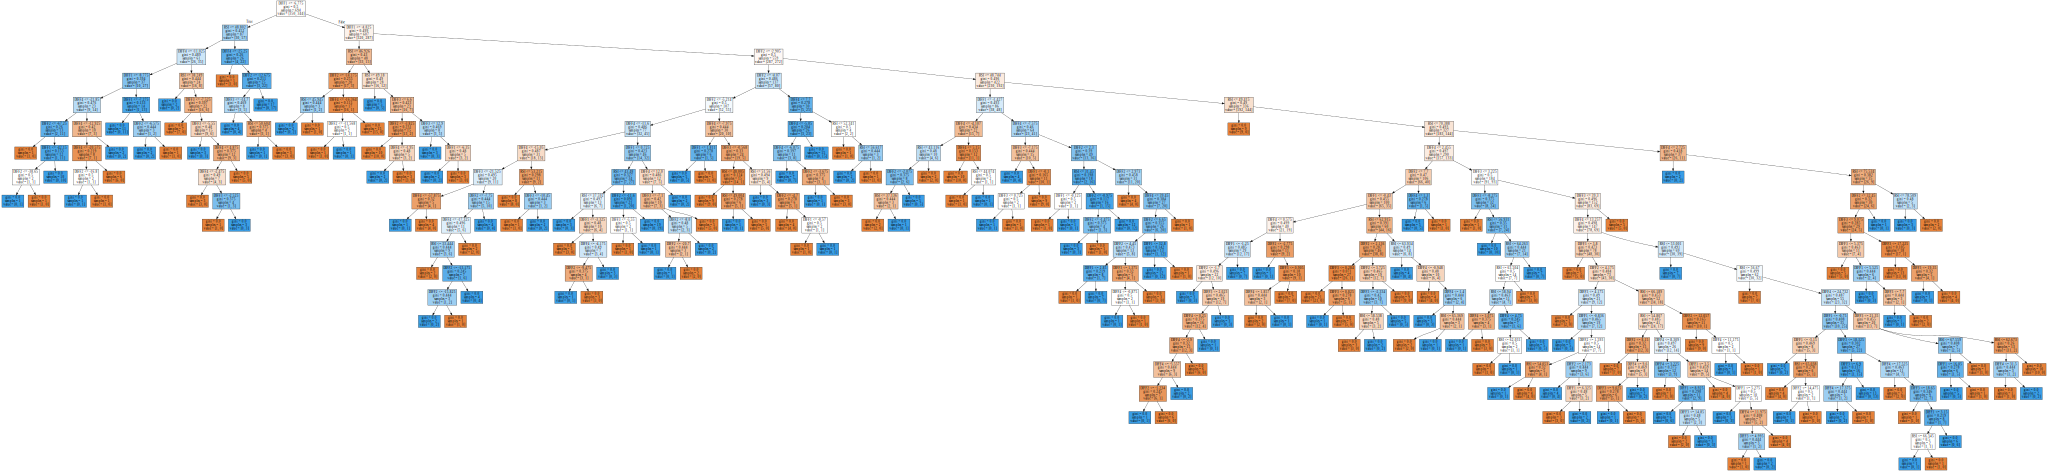

In [44]:
viz_data=tree.export_graphviz(model,out_file=None,filled=True,feature_names=independent)
graphviz.Source(viz_data)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model)

In [46]:
pred_y=model.predict(test_X)

In [47]:
pred_y

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.50      0.44      0.46       151
           1       0.48      0.54      0.51       147

    accuracy                           0.49       298
   macro avg       0.49      0.49      0.49       298
weighted avg       0.49      0.49      0.49       298

